# INFO 3401 – Class 07: Groupby-Aggregation

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT).

## Learning Objectives
This may review content you have learned in other classes, but we want to start with the same foundation since pandas is so fundamental to everything else we will do in this class!

* Improving familiarity with concat to combine multiple files
* Using groupby and aggregation in pandas to reshape and summarize large data
* Exploring the Social Security Administration's "baby names" data

## Load libraries

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sb

import os

## Inspect a single file

Load up the CO.TXT file as an example.

In [3]:
co_df = pd.read_csv('./namesbystate/CO.TXT')
co_df.head()

,CO,F,1910,Mary,193
0,CO,F,1910,Helen,112
1,CO,F,1910,Dorothy,87
2,CO,F,1910,Ruth,68
3,CO,F,1910,Margaret,67
4,CO,F,1910,Frances,56


Do something about the missing header.

In [4]:
co_df = pd.read_csv('./namesbystate/CO.TXT',header=None)
co_df.head()

,0,1,2,3,4
0,CO,F,1910,Mary,193
1,CO,F,1910,Helen,112
2,CO,F,1910,Dorothy,87
3,CO,F,1910,Ruth,68
4,CO,F,1910,Margaret,67


In [5]:
co_df.columns = ['State','Sex','Year','Name','Count']
co_df.head()

,State,Sex,Year,Name,Count
0,CO,F,1910,Mary,193
1,CO,F,1910,Helen,112
2,CO,F,1910,Dorothy,87
3,CO,F,1910,Ruth,68
4,CO,F,1910,Margaret,67


## Read in dozens of files

Use the `os.listdir` function to get a list of all files.

In [6]:
os.listdir('./namesbystate/')

['IN.TXT',
 'IL.TXT',
 'KS.TXT',
 'SC.TXT',
 'HI.TXT',
 '.DS_Store',
 'GA.TXT',
 'SD.TXT',
 'CO.TXT',
 'NH.TXT',
 'MS.TXT',
 'MD.TXT',
 'UT.TXT',
 'LA.TXT',
 'ME.TXT',
 'WI.TXT',
 'NJ.TXT',
 'AR.TXT',
 'NY.TXT',
 'MT.TXT',
 'OK.TXT',
 'MA.TXT',
 'NM.TXT',
 'WY.TXT',
 'OH.TXT',
 'OR.TXT',
 'NV.TXT',
 'TX.TXT',
 'TN.TXT',
 'AZ.TXT',
 'MN.TXT',
 'WA.TXT',
 'WV.TXT',
 'NC.TXT',
 'MO.TXT',
 'AL.TXT',
 'VA.TXT',
 'CA.TXT',
 'CT.TXT',
 'AK.TXT',
 'ND.TXT',
 'VT.TXT',
 'MI.TXT',
 'NE.TXT',
 'KY.TXT',
 'ID.TXT',
 'DC.TXT',
 'IA.TXT',
 'FL.TXT',
 'PA.TXT',
 'RI.TXT',
 'DE.TXT']

Write a loop and re-use the code above to read in all the state files.

In [7]:
all_states_list = []

state_files = [f for f in os.listdir('./namesbystate/') if '.TXT' in f]

for f in state_files:
    # Read in file to a DataFrame
    _df = pd.read_csv('./namesbystate/'+f,header=None)
    
    # Rename column names
    _df.columns = ['State','Sex','Year','Name','Count']
    
    # Add file to all_states_list for concat later
    all_states_list.append(_df)

In [8]:
len(all_states_list)

51

## Concatenate and inspect

Use concatenate to combine all the files together into a single DataFrame called `all_states_df`.

In [9]:
all_states_df = pd.concat(all_states_list,ignore_index=True)

Inspect the head and tail of `all_states_df`.

In [10]:
all_states_df.head()

,State,Sex,Year,Name,Count
0,IN,F,1910,Mary,619
1,IN,F,1910,Helen,324
2,IN,F,1910,Ruth,238
3,IN,F,1910,Dorothy,215
4,IN,F,1910,Mildred,200


In [11]:
all_states_df.tail()

,State,Sex,Year,Name,Count
6028146,DE,M,2018,Rocco,5
6028147,DE,M,2018,Rylan,5
6028148,DE,M,2018,Semaj,5
6028149,DE,M,2018,Steven,5
6028150,DE,M,2018,Thiago,5


In [12]:
'{:,}'.format(len(all_states_df))

'6,028,151'

## Save combined file

Save the combined file to disk.

In [13]:
all_states_df.to_csv('all_states_babynames.csv',encoding='utf8',index=False)

In [2]:
all_states_df = pd.read_csv('all_states_babynames.csv',encoding='utf8')
all_states_df.head()

,State,Sex,Year,Name,Count
0,IN,F,1910,Mary,619
1,IN,F,1910,Helen,324
2,IN,F,1910,Ruth,238
3,IN,F,1910,Dorothy,215
4,IN,F,1910,Mildred,200


## Check Ns

Check each column to make sure it has the values we expect.

In [3]:
all_states_df['State'].unique()

array(['IN', 'IL', 'KS', 'SC', 'HI', 'GA', 'SD', 'CO', 'NH', 'MS', 'MD',
       'UT', 'LA', 'ME', 'WI', 'NJ', 'AR', 'NY', 'MT', 'OK', 'MA', 'NM',
       'WY', 'OH', 'OR', 'NV', 'TX', 'TN', 'AZ', 'MN', 'WA', 'WV', 'NC',
       'MO', 'AL', 'VA', 'CA', 'CT', 'AK', 'ND', 'VT', 'MI', 'NE', 'KY',
       'ID', 'DC', 'IA', 'FL', 'PA', 'RI', 'DE'], dtype=object)

In [4]:
all_states_df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [5]:
all_states_df['Year'].unique()

array([1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [6]:
len(all_states_df['Name'].unique())

31595

In [7]:
all_states_df['Count'].max()

10021

In [8]:
all_states_df['Count'].min()

5

## Groupby

Perform our first groupby.

In [20]:
all_states_df.head()

,State,Sex,Year,Name,Count
0,IN,F,1910,Mary,619
1,IN,F,1910,Helen,324
2,IN,F,1910,Ruth,238
3,IN,F,1910,Dorothy,215
4,IN,F,1910,Mildred,200


In [21]:
all_states_gb = all_states_df.groupby(['Name'])

In [22]:
brian_groups = all_states_gb.groups['Brian']
all_states_df.loc[brian_groups]

,State,Sex,Year,Name,Count
23473,IN,F,1958,Brian,5
26454,IN,F,1962,Brian,5
30087,IN,F,1967,Brian,5
35341,IN,F,1974,Brian,5
36112,IN,F,1975,Brian,5
...,...,...,...,...,...
6026826,DE,M,2013,Brian,12
6027038,DE,M,2014,Brian,16
6027313,DE,M,2015,Brian,10
6027545,DE,M,2016,Brian,10


In [23]:
abram_groups = all_states_gb.groups['Abram']
all_states_df.loc[abram_groups]

,State,Sex,Year,Name,Count
107479,IN,M,1978,Abram,5
108490,IN,M,1980,Abram,8
109152,IN,M,1981,Abram,5
110741,IN,M,1984,Abram,5
112910,IN,M,1988,Abram,6
...,...,...,...,...,...
5949210,PA,M,2014,Abram,24
5950635,PA,M,2015,Abram,20
5951897,PA,M,2016,Abram,27
5953303,PA,M,2017,Abram,23


Use the `.groups` and `.get_group` methods to illustrate how a groupby is similar to a Boolean index.

In [24]:
all_states_gb.get_group('Nikhil')['Count'].sum()

3583

## Aggregation

Make an aggregation dictionary.

In [25]:
all_states_df.head()

,State,Sex,Year,Name,Count
0,IN,F,1910,Mary,619
1,IN,F,1910,Helen,324
2,IN,F,1910,Ruth,238
3,IN,F,1910,Dorothy,215
4,IN,F,1910,Mildred,200


In [26]:
agg_d = {'Count':['sum'],
         'Year':['min','max']
        }



Use the aggregation dictionary with the `.agg` method on the groupby object.

In [27]:
all_states_agg = all_states_gb.agg(agg_d).sort_values(('Count','sum'),ascending=False)

all_states_agg.tail(20)

Count  Year      
            sum   min   max
Name                       
Madeira       5  2006  2006
Maddi         5  2009  2009
Madasyn       5  2006  2006
Madaleine     5  1995  1995
Maclean       5  1997  1997
Lynix         5  2015  2015
Mackson       5  2015  2015
Mackenson     5  1993  1993
Maciah        5  2012  2012
Macenzie      5  2003  2003
Macala        5  1994  1994
Maame         5  1999  1999
Maahir        5  2017  2017
Lyzeth        5  1989  1989
Lyvia         5  2017  2017
Lytzy         5  2001  2001
Lynnex        5  2015  2015
Lynnett       5  1973  1973
Lynnann       5  1962  1962
Zyshonne      5  1998  1998

## Some EDA using groupby-aggregation 

In [28]:
all_states_df.head()

,State,Sex,Year,Name,Count
0,IN,F,1910,Mary,619
1,IN,F,1910,Helen,324
2,IN,F,1910,Ruth,238
3,IN,F,1910,Dorothy,215
4,IN,F,1910,Mildred,200


In [9]:
all_states_gb_year_name = all_states_df.groupby(['Year','Name'])

In [10]:
# Aggregate
year_name_count_df = all_states_gb_year_name.agg({'Count':'sum'})

# Unstack
year_name_count_df = year_name_count_df['Count'].unstack('Name')

# Fill NaNs
year_name_count_df.fillna(0,inplace=True)

year_name_count_df.head()

Name,Aaban,Aadan,Aadarsh,Aaden,Aadhav,Aadhira,Aadhya,Aadi,Aadil,Aadin,Aadit,Aaditya,Aadvik,Aadya,Aadyn,Aahan,Aahana,Aahil,Aahna,Aaiden,Aaima,Aaira,Aairah,Aakash,Aalaya,Aalayah,Aaleah,Aaleyah,Aalia,Aaliah,Aalijah,Aaliya,Aaliyah,Aaliyha,Aalliyah,Aalyah,Aalyiah,Aamani,Aamina,Aaminah,Aamir,Aamira,Aamiyah,Aamori,Aanav,Aanchal,Aanika,Aaniya,Aaniyah,Aanshi,...,Zuzanna,Zvi,Zya,Zyah,Zyair,Zyaira,Zyairah,Zyaire,Zyan,Zyana,Zyanna,Zyanya,Zyasia,Zyeria,Zygmund,Zygmunt,Zyien,Zyion,Zyir,Zyire,Zykeria,Zykeriah,Zykerria,Zykia,Zykierra,Zykira,Zykiria,Zyla,Zylah,Zylan,Zylen,Zyler,Zymari,Zymarion,Zymere,Zymier,Zymiere,Zymir,Zymire,Zyon,Zyonna,Zyquan,Zyquavious,Zyra,Zyrah,Zyren,Zyria,Zyriah,Zyron,Zyshonne
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


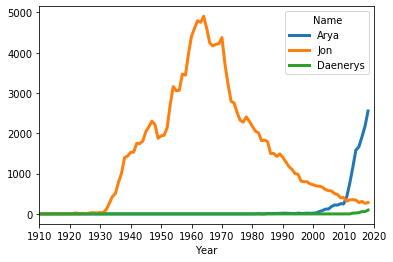

In [68]:
_df = year_name_count_df[['Arya','Jon','Daenerys']].reindex(range(1910,2021))
ax = _df.plot(lw=3)
ax.set_xticks(range(1910,2021,10))

In [46]:
# Group by state and name
all_states_gb_state_name = all_states_df.groupby(['State','Name'])

# Aggregate by count
state_name_count_df = all_states_gb_state_name.agg({'Count':'sum'})

# Unstack
state_name_count_df = state_name_count_df['Count'].unstack('State')

# Fill NaN
state_name_count_df.fillna(0,inplace=True)

state_name_count_df.head()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaban,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aadan,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aadarsh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaden,0.0,91.0,39.0,90.0,627.0,65.0,39.0,0.0,5.0,272.0,176.0,6.0,45.0,0.0,204.0,54.0,39.0,72.0,73.0,40.0,54.0,5.0,125.0,58.0,85.0,59.0,5.0,124.0,5.0,16.0,0.0,65.0,17.0,34.0,253.0,175.0,42.0,14.0,131.0,6.0,67.0,6.0,83.0,508.0,14.0,83.0,0.0,59.0,65.0,19.0,0.0
Aadhav,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
state_name_count_df.loc['Brian'].sort_values(ascending=False)

State
CA    125320.0
NY    101095.0
PA     72156.0
IL     69542.0
OH     67647.0
MI     57446.0
TX     48749.0
NJ     45514.0
MA     42724.0
FL     34534.0
IN     33013.0
WI     31308.0
MN     26731.0
MO     25124.0
VA     24374.0
MD     22560.0
WA     22382.0
NC     22043.0
GA     20287.0
CT     18892.0
IA     18677.0
TN     16119.0
KY     15668.0
LA     15462.0
CO     13890.0
OR     12897.0
AZ     12379.0
KS     12253.0
AL     11484.0
OK     11341.0
SC     10064.0
WV      9220.0
NE      9159.0
UT      8264.0
AR      7117.0
DC      6792.0
MS      6237.0
ME      6172.0
RI      6075.0
NH      5824.0
NM      4799.0
ID      4576.0
ND      4063.0
HI      4016.0
SD      3979.0
NV      3872.0
MT      3778.0
DE      3760.0
VT      3003.0
AK      2291.0
WY      1886.0
Name: Brian, dtype: float64

## Compare to `pivot_table`

Compare the results using groupby-aggregation to using `pivot_table`.

In [52]:
state_name_pivot_df = pd.pivot_table(all_states_df,
                                     values='Count',
                                     index='Name',
                                     columns='State',
                                     aggfunc='sum'
                                    )

state_name_pivot_df.fillna(0,inplace=True)

state_name_pivot_df.head()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaban,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aadan,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aadarsh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaden,0.0,91.0,39.0,90.0,627.0,65.0,39.0,0.0,5.0,272.0,176.0,6.0,45.0,0.0,204.0,54.0,39.0,72.0,73.0,40.0,54.0,5.0,125.0,58.0,85.0,59.0,5.0,124.0,5.0,16.0,0.0,65.0,17.0,34.0,253.0,175.0,42.0,14.0,131.0,6.0,67.0,6.0,83.0,508.0,14.0,83.0,0.0,59.0,65.0,19.0,0.0
Aadhav,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
